img shape: (480, 640, 3)


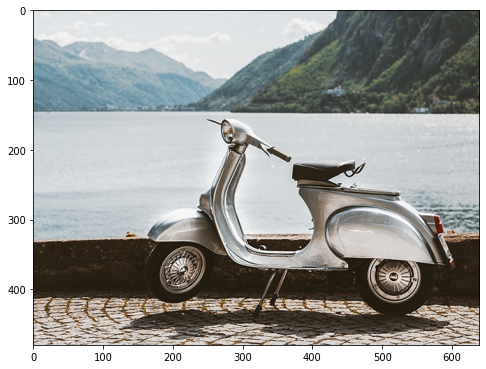

In [2]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 스쿠터 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('scooter.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [3]:
import selectivesearch 

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 51


In [4]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 434, 98), (379, 0, 105, 102), (436, 0, 142, 111), (477, 0, 162, 119), (53, 32, 234, 28), (0, 39, 188, 103), (221, 41, 175, 105), (283, 43, 163, 102), (480, 44, 159, 103), (43, 47, 249, 98), (285, 70, 256, 77), (0, 71, 129, 74), (0, 146, 453, 117), (275, 146, 364, 184), (536, 150, 103, 48), (254, 195, 142, 173), (299, 218, 340, 154), (545, 227, 94, 59), (0, 252, 249, 79), (0, 253, 365, 185), (427, 284, 141, 71), (241, 292, 398, 187), (421, 303, 151, 114), (78, 412, 215, 67), (0, 415, 207, 64), (402, 457, 237, 22), (0, 412, 293, 67), (275, 146, 364, 184), (254, 195, 385, 177), (285, 44, 354, 103), (254, 195, 385, 177), (283, 0, 201, 145), (0, 39, 292, 106), (285, 0, 354, 147), (285, 0, 354, 147), (0, 253, 639, 226), (254, 195, 385, 222), (221, 0, 263, 146), (0, 0, 434, 98), (0, 39, 292, 106), (0, 146, 453, 185), (0, 253, 639, 226), (275, 146, 364, 184), (221, 0, 418, 147), (0, 253, 639, 226), (0, 195, 639, 284), (0, 0, 434, 145), (0, 0, 639, 147), (0, 146, 639, 333), (0, 146, 639

#### 바운딩박스 시각화

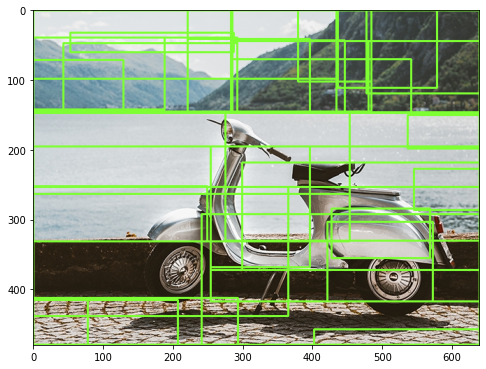

In [5]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

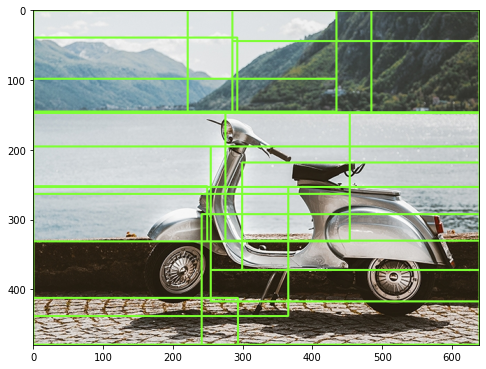

In [6]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

In [7]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

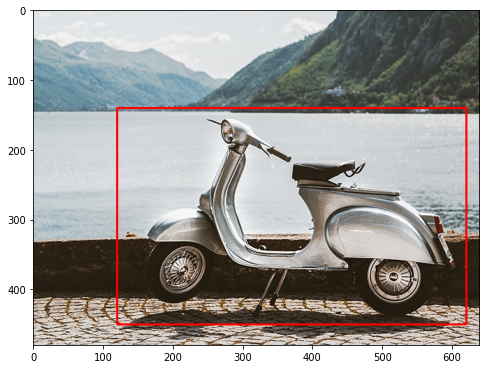

In [33]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 
gt_box = [120, 140, 620, 450]


img = cv2.imread('scooter.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [18]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 60


In [19]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.0
index: 1 iou: 0.0
index: 2 iou: 0.0
index: 3 iou: 0.0
index: 4 iou: 0.0
index: 5 iou: 0.0005711973724920865
index: 6 iou: 0.0
index: 7 iou: 0.0
index: 8 iou: 0.017516657587059465
index: 9 iou: 0.0
index: 10 iou: 0.0
index: 11 iou: 0.0573170536386399
index: 12 iou: 0.9863057282621664
index: 13 iou: 0.6013978494623656
index: 14 iou: 0.0
index: 15 iou: 0.15147849462365592
index: 16 iou: 0.48021505376344087
index: 17 iou: 0.0
index: 18 iou: 0.16509408602150538
index: 19 iou: 0.039919354838709675
index: 20 iou: 0.06054435483870968
index: 21 iou: 0.0
index: 22 iou: 0.06727822580645161
index: 23 iou: 0.0
index: 24 iou: 0.2232997311827957
index: 25 iou: 0.4990322580645161
index: 26 iou: 0.11568548387096775
index: 27 iou: 0.0
index: 28 iou: 0.033019245820212116
index: 29 iou: 0.03351075072536172
index: 30 iou: 0.0
index: 31 iou: 0.0
index: 32 iou: 0.05676684226123876
index: 33 iou: 0.5479569892473118
index: 34 iou: 0.0
index: 35 iou: 0.0017023945523374326
index: 36 iou: 0.6013

In [20]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 434, 98),
 (0, 0, 434, 98),
 (0, 0, 639, 148),
 (0, 0, 639, 479),
 (0, 0, 639, 479),
 (0, 39, 188, 103),
 (0, 39, 292, 103),
 (0, 39, 292, 277),
 (0, 39, 292, 292),
 (0, 39, 292, 292),
 (0, 39, 618, 292),
 (0, 39, 639, 440),
 (0, 71, 201, 245),
 (0, 146, 137, 149),
 (0, 148, 639, 331),
 (0, 256, 138, 75),
 (0, 286, 387, 193),
 (0, 286, 639, 193),
 (0, 328, 138, 110),
 (0, 412, 281, 67),
 (0, 412, 387, 67),
 (21, 47, 271, 90),
 (139, 139, 482, 313),
 (142, 142, 476, 188),
 (142, 142, 476, 188),
 (142, 142, 476, 188),
 (142, 253, 117, 77),
 (142, 286, 223, 149),
 (142, 292, 476, 156),
 (142, 292, 497, 187),
 (143, 147, 196, 115),
 (201, 0, 438, 148),
 (201, 41, 195, 96),
 (202, 0, 437, 148),
 (202, 0, 437, 148),
 (202, 0, 437, 148),
 (202, 44, 437, 104),
 (254, 148, 364, 224),
 (254, 148, 364, 224),
 (254, 148, 364, 269),
 (254, 148, 364, 269),
 (254, 195, 142, 173),
 (299, 148, 319, 224),
 (309, 0, 232, 137),
 (309, 43, 137, 94),
 (309, 43, 232, 94),
 (317, 426, 322, 53),
 (421,

img shape: (480, 640, 3)
index: 11 iou: 0.9863057282621664 rectangle: (139, 139, 621, 452)
index: 12 iou: 0.6013978494623656 rectangle: (142, 142, 618, 330)
index: 29 iou: 0.5479569892473118 rectangle: (254, 148, 618, 372)
index: 32 iou: 0.6013978494623656 rectangle: (142, 142, 618, 330)
index: 34 iou: 0.5479569892473118 rectangle: (254, 148, 618, 372)
index: 36 iou: 0.6013978494623656 rectangle: (142, 142, 618, 330)
index: 37 iou: 0.6580376344086022 rectangle: (254, 148, 618, 417)
index: 45 iou: 0.6580376344086022 rectangle: (254, 148, 618, 417)
index: 46 iou: 0.6731398799158576 rectangle: (0, 148, 639, 479)
index: 53 iou: 0.5292360221937686 rectangle: (0, 39, 639, 479)


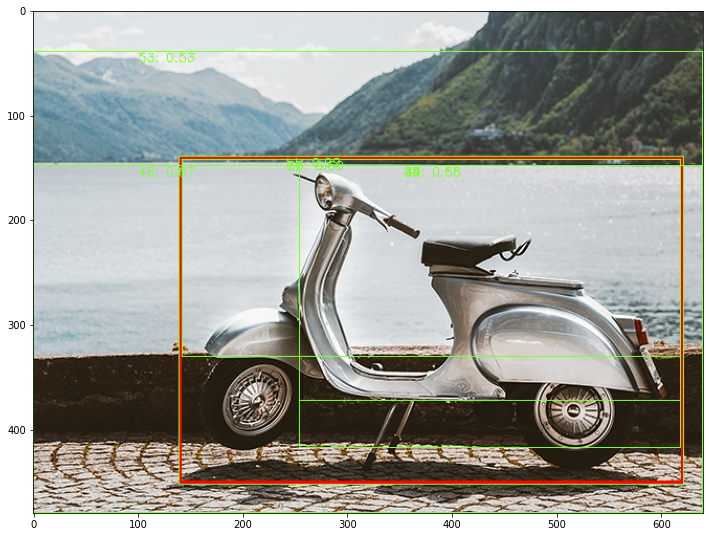

In [22]:
img = cv2.imread('scooter.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [140, 140, 620, 450]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()
    